In [124]:
import sqlite3
data_base=f'D:/AFL_GRP/DataBase/AFLStats.db'
table_name='ScrapedTeamLadderePossition'
connection=sqlite3.connect(database=data_base)
cursor = connection.cursor()
drop_query = f"DROP TABLE IF EXISTS {table_name};"
cursor.execute(drop_query)
connection.commit()
connection.close()

In [179]:
import pandas as pd
import requests
import sqlite3

team_trans={'Adelaide':'AD','Brisbane Lions':'BL','Carlton':'CA','Collingwood':'CW','Essendon':'ES',
                 'Fremantle':'FR', 'Geelong':'GE','Gold Coast':'GC','GWS Giants':'GW','Hawthorn':'HW','Melbourne':'ME','North Melbourne':'NM',
                 'Port Adelaide':'PA','Richmond':'RI','St Kilda':'SK','Sydney':'SW','West Coast':'WC','Western Bulldogs':'WB'}


for season in range(2024,2025):
    xround='R25'
    my_round=24

    url = f'https://finalsiren.com/AFLLadder.asp?AFLLadderTypeID=1&SeasonID={season}&Round={my_round}-1'
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        df_scraped = pd.read_html(response.text)
   
    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")

    df_out=df_scraped[0] 
    df_out['Round']=xround
    df_out['Year']=season
    df_out['Team']=df_out['Team'].replace(team_trans)
    df_out=df_out[['Pos','Team','P','W','L','For','Agn','Stk','Pts','%','Round','Year']]
    df_out

    data_base=f'D:/AFL_GRP/DataBase/AFLStats.db'
    table_name='ScrapedTeamLadderePossition'
    connection=sqlite3.connect(database=data_base)
    df_out.to_sql(table_name, connection, index=False, if_exists='append')
    connection.close()

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_17188\4052396986.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_scraped = pd.read_html(response.text)


In [197]:
data_base=f'D:/AFL_GRP/DataBase/AFLStats.db'
connection=sqlite3.connect(database=data_base)
query=f''' 
select team,year,round,Pos,count(1)
 from ScrapedTeamLadderePossition
 group by team,year,round,pos
 having year=2024
 and team = 'PA'
 '''
df_tlp=pd.read_sql(query,connection)
connection.close()
# df_tlp

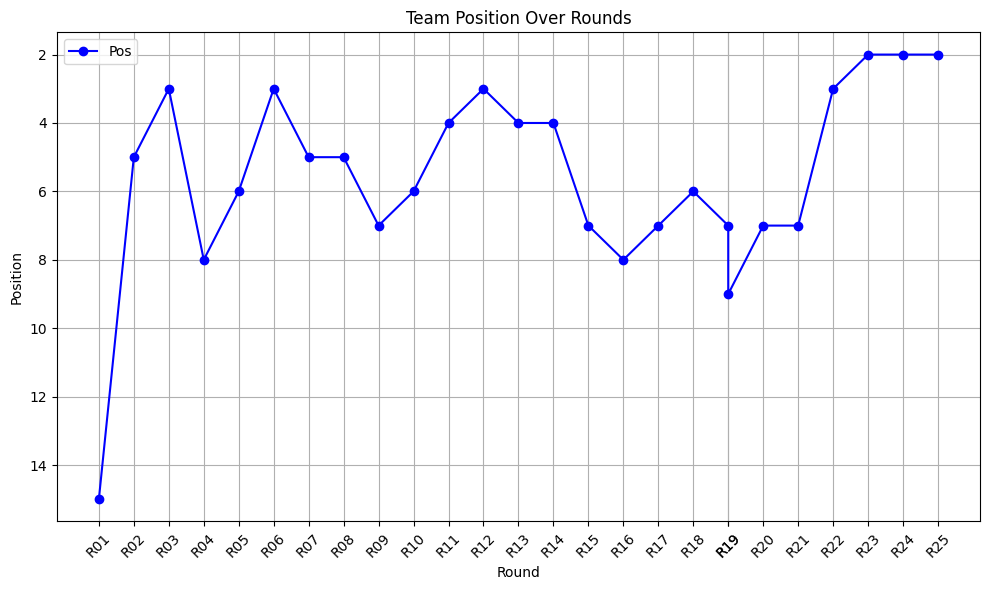

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame with the provided data

df=df_tlp
# Convert 'Round' to a numeric value for plotting
df['Round_num'] = df['Round'].str.extract('(\d+)').astype(int)

# Plotting using pandas
df.plot(x='Round_num', y='Pos', kind='line', marker='o', linestyle='-', color='b', figsize=(10, 6))

# Customize the plot
plt.xlabel('Round')
plt.ylabel('Position')
plt.title('Team Position Over Rounds')
plt.gca().invert_yaxis()  # Invert y-axis so lower positions are better
plt.xticks(df['Round_num'], df['Round'], rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
